In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from sklearn.cluster import KMeans
from scipy.stats import zscore
from scipy.spatial import distance
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

Load the CSV file (i.e marketing.csv) and display the first 5 rows of the dataframe. Check the shape and info of the dataset.

In [209]:
df=pd.read_csv('marketing.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0


In [70]:
df.shape

(2240, 27)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

 3.Check the percentage of missing values? If there is presence of missing values, treat them accordingly.

In [72]:
df.isnull().mean()*100

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Response               0.000000
dtype: float64

 We have missing value in "Income" Column
- We will treat it accordingly

In [73]:
# Filling the missing value in the income my mean
df['Income'] = df['Income'].fillna(df['Income'].mean())

## Lets recheck the missing values
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
dtype: int64

4. Check if there are any duplicate records in the dataset? If any drop them.

In [74]:

# Check for duplicate records
duplicate_records = df.duplicated()

# Print the duplicate records
print(df[duplicate_records])

Empty DataFrame
Columns: [ID, Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Response]
Index: []

[0 rows x 27 columns]


In [75]:
len(df[df.duplicated()])

0

In [ ]:
there are no missing values

In [ ]:
5. Drop the columns which you think redundant for the analysis

In [76]:
# dropping redundant columns
df = df.drop(columns=['ID','Dt_Customer'],axis=1)

In [10]:
print(df)

      Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0           1957  Graduation         Single  58138.0        0         0   
1           1954  Graduation         Single  46344.0        1         1   
2           1965  Graduation       Together  71613.0        0         0   
3           1984  Graduation       Together  26646.0        1         0   
4           1981         PhD        Married  58293.0        1         0   
...          ...         ...            ...      ...      ...       ...   
2235        1967  Graduation        Married  61223.0        0         1   
2236        1946         PhD       Together  64014.0        2         1   
2237        1981  Graduation       Divorced  56981.0        0         0   
2238        1956      Master       Together  69245.0        0         1   
2239        1954         PhD        Married  52869.0        1         1   

      Recency  MntWines  MntFruits  MntMeatProducts  ...  NumCatalogPurchases  \
0          58     

 6. Check the unique categories in the column 'Marital_Status'
- i) Group categories 'Married', 'Together' as 'relationship'
- ii) Group categories 'Divorced', 'Widow', 'Alone', 'YOLO', and 'Absurd' as 'Single'.

In [214]:
# Check the unique categories in the 'Marital_Status' column
unique_categories = df['Marital_Status'].unique()
print(unique_categories)

# Group categories 'Married' and 'Together' as 'relationship'
df['Marital_Status'] = df['Marital_Status'].replace(['Married', 'Together'], 'relationship')

# Group categories 'Divorced', 'Widow', 'Alone', 'YOLO', and 'Absurd' as 'Single'
df['Marital_Status'] = df['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'], 'Single')

# Print the updated dataset
print(df)

['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']
         ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation   relationship  71613.0        0   
3      6182        1984  Graduation   relationship  26646.0        1   
4      5324        1981         PhD   relationship  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation   relationship  61223.0        0   
2236   4001        1946         PhD   relationship  64014.0        2   
2237   7270        1981  Graduation         Single  56981.0        0   
2238   8235        1956      Master   relationship  69245.0        0   
2239   9405        1954         PhD   relationship  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumCatal

7. Group the columns 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', and 'MntGoldProds' as 'Total_Expenses'

In [215]:
# Group the columns into 'Total_Expenses'
df['Total_Expenses'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

# Drop the individual expense columns if needed
df = df.drop(columns=['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'])

# Print the updated dataset
print(df)

         ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation   relationship  71613.0        0   
3      6182        1984  Graduation   relationship  26646.0        1   
4      5324        1981         PhD   relationship  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation   relationship  61223.0        0   
2236   4001        1946         PhD   relationship  64014.0        2   
2237   7270        1981  Graduation         Single  56981.0        0   
2238   8235        1956      Master   relationship  69245.0        0   
2239   9405        1954         PhD   relationship  52869.0        1   

      Teenhome Dt_Customer  Recency  NumDealsPurchases  ...  \
0            0    4/9/2012       58                  3  ...   
1        

 8. Group the columns 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', and 'NumDealsPurchases' as 'Num_Total_Purchases'

In [216]:
# Group the columns into 'Num_Total_Purchases'
df['Num_Total_Purchases'] = df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases']].sum(axis=1)

# Drop the individual purchase columns if needed
df = df.drop(columns=['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases'])

# Print the updated dataset
print(df)

         ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation   relationship  71613.0        0   
3      6182        1984  Graduation   relationship  26646.0        1   
4      5324        1981         PhD   relationship  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation   relationship  61223.0        0   
2236   4001        1946         PhD   relationship  64014.0        2   
2237   7270        1981  Graduation         Single  56981.0        0   
2238   8235        1956      Master   relationship  69245.0        0   
2239   9405        1954         PhD   relationship  52869.0        1   

      Teenhome Dt_Customer  Recency  NumWebVisitsMonth  AcceptedCmp3  \
0            0    4/9/2012       58                  7         

Group the columns 'Kidhome' and 'Teenhome' as 'Kids'

In [217]:
# Group the columns into 'Kids'
df['Kids'] = df[['Kidhome', 'Teenhome']].sum(axis=1)

# Drop the individual columns if needed
df = df.drop(columns=['Kidhome', 'Teenhome'])

# Print the updated dataset
print(df)

         ID  Year_Birth   Education Marital_Status   Income Dt_Customer  \
0      5524        1957  Graduation         Single  58138.0    4/9/2012   
1      2174        1954  Graduation         Single  46344.0    8/3/2014   
2      4141        1965  Graduation   relationship  71613.0  21-08-2013   
3      6182        1984  Graduation   relationship  26646.0   10/2/2014   
4      5324        1981         PhD   relationship  58293.0  19-01-2014   
...     ...         ...         ...            ...      ...         ...   
2235  10870        1967  Graduation   relationship  61223.0  13-06-2013   
2236   4001        1946         PhD   relationship  64014.0   10/6/2014   
2237   7270        1981  Graduation         Single  56981.0  25-01-2014   
2238   8235        1956      Master   relationship  69245.0  24-01-2014   
2239   9405        1954         PhD   relationship  52869.0  15-10-2012   

      Recency  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0          58        

Group columns 'AcceptedCmp1 , 2 , 3 , 4, 5' and 'Response' as 'TotalAcceptedCmp'

In [218]:

# Group the columns into 'TotalAcceptedCmp'
df['TotalAcceptedCmp'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].sum(axis=1)

# Drop the individual columns if needed
df = df.drop(columns=['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response'])

# Print the updated dataset
print(df)

         ID  Year_Birth   Education Marital_Status   Income Dt_Customer  \
0      5524        1957  Graduation         Single  58138.0    4/9/2012   
1      2174        1954  Graduation         Single  46344.0    8/3/2014   
2      4141        1965  Graduation   relationship  71613.0  21-08-2013   
3      6182        1984  Graduation   relationship  26646.0   10/2/2014   
4      5324        1981         PhD   relationship  58293.0  19-01-2014   
...     ...         ...         ...            ...      ...         ...   
2235  10870        1967  Graduation   relationship  61223.0  13-06-2013   
2236   4001        1946         PhD   relationship  64014.0   10/6/2014   
2237   7270        1981  Graduation         Single  56981.0  25-01-2014   
2238   8235        1956      Master   relationship  69245.0  24-01-2014   
2239   9405        1954         PhD   relationship  52869.0  15-10-2012   

      Recency  NumWebVisitsMonth  Complain  Total_Expenses  \
0          58                  7     

11. Drop those columns which we have used above for obtaining new features

In [89]:
col_del = ["AcceptedCmp1" , "AcceptedCmp2", "AcceptedCmp3" , "AcceptedCmp4","AcceptedCmp5", "Response","NumWebVisitsMonth", "NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumDealsPurchases" , "Kidhome", "Teenhome","MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
df=df.drop(columns=col_del,axis=1)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,Complain
0,5524,1957,Graduation,Single,58138.0,4/9/2012,58,0
1,2174,1954,Graduation,Single,46344.0,8/3/2014,38,0
2,4141,1965,Graduation,Together,71613.0,21-08-2013,26,0
3,6182,1984,Graduation,Together,26646.0,10/2/2014,26,0
4,5324,1981,PhD,Married,58293.0,19-01-2014,94,0


12. Extract 'age' using the column 'Year_Birth' and then drop the column 'Year_birth'

In [99]:
import datetime

current_year = datetime.datetime.now().year
df['Age'] = current_year - df['Year_Birth']
df = df.drop('Year_Birth', axis=1)

In [100]:
df.head(2)

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
0,5524,Graduation,Single,58138.0,0,0,4/9/2012,58,635,88,...,4,7,0,0,0,0,0,0,1,66
1,2174,Graduation,Single,46344.0,1,1,8/3/2014,38,11,1,...,2,5,0,0,0,0,0,0,0,69


keep a copy of clean dataset

In [219]:
dfc=df.copy()

13. Encode the categorical variables in the dataset

In [107]:
# Label Encoding
cate=['Education', 'Marital_Status']
lbl_encode = LabelEncoder()
for i in cate:
    df[i]=df[[i]].apply(lbl_encode.fit_transform)

In [109]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,2,4,58138.0,0,0,4/9/2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,2,4,46344.0,1,1,8/3/2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,2,5,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,2,5,26646.0,1,0,10/2/2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,4,3,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0


 14. Standardize the columns, so that values are in a particular range

In [155]:
df['Dt_Customer'].unique()

array(['4/9/2012', '8/3/2014', '21-08-2013', '10/2/2014', '19-01-2014',
       '9/9/2013', '13-11-2012', '8/5/2013', '6/6/2013', '13-03-2014',
       '15-11-2013', '10/10/2012', '24-11-2012', '24-12-2012',
       '31-08-2012', '28-03-2013', '3/11/2012', '8/8/2012', '6/1/2013',
       '23-12-2012', '11/1/2014', '18-03-2013', '2/1/2013', '27-05-2013',
       '20-02-2013', '31-05-2013', '22-11-2013', '22-05-2014',
       '11/5/2013', '29-10-2012', '29-08-2013', '31-12-2013', '2/9/2013',
       '11/2/2014', '1/2/2013', '29-04-2013', '12/3/2013', '5/11/2013',
       '2/10/2013', '28-06-2014', '9/11/2012', '24-05-2013', '1/1/2014',
       '8/11/2012', '12/5/2014', '11/8/2012', '7/6/2014', '12/6/2013',
       '19-11-2012', '2/4/2013', '28-04-2014', '17-06-2013', '3/3/2014',
       '4/7/2013', '7/9/2012', '18-02-2013', '11/6/2013', '6/12/2013',
       '21-05-2013', '11/5/2014', '19-03-2014', '27-09-2013', '8/4/2013',
       '11/9/2012', '14-09-2012', '17-03-2013', '5/4/2013', '30-04-2014',
   

In [156]:
df['Dt_Customer'] = pd.to_numeric(df['Dt_Customer'], errors='coerce')

In [157]:
df['Dt_Customer'] = df['Dt_Customer'].astype(float)

In [149]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [151]:
df['Marital_Status'] = pd.to_numeric(df['Marital_Status'], errors='coerce')

In [158]:
df['Marital_Status'] = df['Marital_Status'].astype(float)

In [159]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [160]:
df['Education'] = pd.to_numeric(df['Education'], errors='coerce')

In [161]:
df['Education'] = df['Education'].astype(float)

In [164]:
df1 = df.copy()
scaled_features = StandardScaler().fit_transform(df1.values)
scaled_features_df = pd.DataFrame(scaled_features, index=df1.index, columns=df1.columns)
scaled_features_df.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,-0.020999,-0.985345,NaN,NaN,0.234063,-0.825218,-0.929894,NaN,0.307039,0.983781,...,2.510890,-0.550785,0.693904,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,2.388846
1,-1.053058,-1.235733,NaN,NaN,-0.234559,1.032559,0.906934,NaN,-0.383664,-0.870479,...,-0.568720,-1.166125,-0.130463,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,-0.418612
2,-0.447070,-0.317643,NaN,NaN,0.769478,-0.825218,-0.929894,NaN,-0.798086,0.362723,...,-0.226541,1.295237,-0.542647,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,-0.418612


15. Apply PCA on the above dataset and determine the number of PCA components to be used so that 90-95% of the variance in data is explained by the same.

In [146]:
cov_matrix = np.cov(scaled_features.T)
cov_matrix

array([[ 1.00044663e+00,  2.76368349e-05,             nan,
                    nan,             nan,  2.40668086e-03,
        -2.58104310e-03,             nan, -4.65448809e-02,
        -2.28885078e-02,  4.60211667e-03, -4.43919937e-03,
        -2.44858793e-02, -7.64496983e-03, -1.34438344e-02,
        -3.71824475e-02, -1.89323486e-02, -3.44167996e-03,
        -1.49335955e-02, -7.44950801e-03, -3.60560931e-02,
        -2.53980586e-02, -7.52038148e-03, -2.16238909e-02,
        -1.50676897e-02,  3.38981712e-02, -2.19776291e-02,
                    nan],
       [ 2.76368349e-05,  1.00044663e+00,             nan,
                    nan,             nan,  2.30278341e-01,
        -3.52268696e-01,             nan, -1.98799637e-02,
        -1.57842989e-01, -1.79252427e-02, -3.08861876e-02,
        -4.16439684e-02, -1.81407051e-02, -6.18457914e-02,
        -6.08727256e-02, -1.45104917e-01, -1.21328797e-01,
        -1.28329345e-01,  1.21193363e-01,  6.18020701e-02,
        -6.05366207e-02,  7.12

In [166]:
## step2: Calculate the eigen values and eigen vectors.
eig_vals, eig_vectors = np.linalg.eig(cov_matrix)
print('eigein vals:','\n',eig_vals)
print('\n')
print('eigein vectors','\n',eig_vectors)

eigein vals: 
 [6.26949298e+08 1.05391132e+07 8.23957982e+04 2.81818055e+04
 3.10140068e+03 1.65369565e+03 9.23043751e+02 8.36915230e+02
 6.98192103e+02 1.36861129e+02 6.79406599e+00 5.33730498e+00
 3.33233317e+00 3.01081350e+00 1.78496673e+00 2.08636103e-01
 1.44419938e-01 1.17176914e-01 6.91269784e-02 5.13988745e-02
 4.20516260e-02 3.56874363e-02 9.21487385e-03 1.12513345e-02]


eigein vectors 
 [[-1.71869925e-03  9.99992854e-01  3.30583281e-03 -2.69481019e-04
   3.08983535e-04  9.24385723e-05 -1.37929739e-04 -4.55053952e-04
   8.24822266e-05  9.08923924e-06  1.72667316e-05  4.36101279e-06
  -1.81381795e-06 -9.72516001e-06 -1.12131676e-05 -1.65445922e-06
   1.39076608e-06  3.84112864e-06  8.87068206e-07  1.75154867e-06
  -1.09384543e-06 -7.42299239e-07  9.87649888e-07 -1.04172352e-07]
 [ 7.70310823e-05  8.04248811e-06 -2.23970994e-03  9.02457897e-03
   2.55368222e-03  6.84363627e-03  1.73687966e-02  1.38258846e-02
  -1.04350650e-03  9.99223444e-01  1.30381432e-02 -1.15953397e-02
  -1

In [167]:
## step3: Scree plot.
total = sum(eig_vals)
var_exp = [(i/total)*100 for i in sorted(eig_vals,reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print('Explained Variance: ',var_exp)
print('Cummulative Variance Explained: ',cum_var_exp)

Explained Variance:  [98.32858287948646, 1.6529184560953696, 0.012922675099843997, 0.0044199379587431635, 0.0004864130713375585, 0.0002593599679693291, 0.00014476702394894782, 0.00013125892137020646, 0.0001095020608262359, 2.1464831166704646e-05, 1.0655580662045095e-06, 8.370846530935228e-07, 5.2263173400171e-07, 4.722056883946883e-07, 2.7994807582956275e-07, 3.2721772562100137e-08, 2.2650329044399032e-08, 1.8377626346279702e-08, 1.084163879745927e-08, 8.061223633318035e-09, 6.595233146848463e-09, 5.597095409961077e-09, 1.7646208147984954e-09, 1.4452292890217017e-09]
Cummulative Variance Explained:  [ 98.32858288  99.98150134  99.99442401  99.99884395  99.99933036
  99.99958972  99.99973449  99.99986575  99.99997525  99.99999671
  99.99999778  99.99999862  99.99999914  99.99999961  99.99999989
  99.99999992  99.99999995  99.99999997  99.99999998  99.99999998
  99.99999999 100.         100.         100.        ]


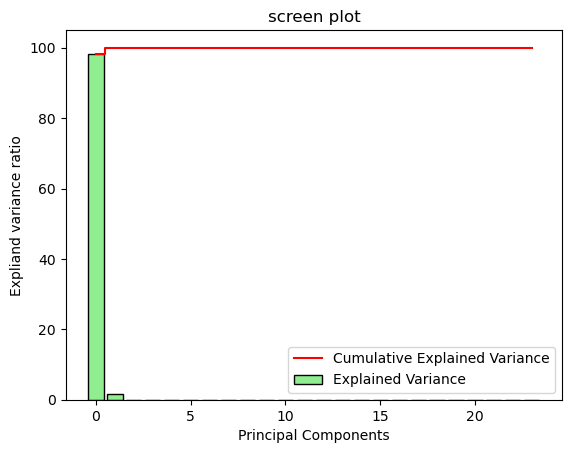

In [182]:
plt.bar(range(len(var_exp)), var_exp, align='center', color='lightgreen', edgecolor='black', label='Explained Variance')
plt.step(range(len(cum_var_exp)), cum_var_exp, where='mid', color='red', label='Cumulative Explained Variance')
plt.title('screen plot')
plt.xlabel('Principal Components')
plt.ylabel('Expliand variance ratio')
plt.legend(loc='best')
plt.show()

16. Apply K-means clustering and segment the data (Use PCA transformed data for clustering)

In [184]:
from sklearn.impute import SimpleImputer
import numpy as np

# Assuming 'scaled_features_df' is your pandas DataFrame with scaled features
imputer = SimpleImputer(strategy='mean')
scaled_features_df = imputer.fit_transform(scaled_features_df)

# Convert the data to float
scaled_features_df = scaled_features_df.astype(float)

# Apply PCA
pca = PCA(n_components=8)
pca_df = pd.DataFrame(pca.fit_transform(scaled_features_df), columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8'])
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,3.768895,-0.048007,-0.316748,2.064443,0.119482,0.030204,0.139909,0.211044
1,-2.366120,0.245773,-0.153093,-0.932754,0.633043,1.074954,-0.714390,0.925481
2,1.619611,0.133385,-1.040828,-0.056139,0.208088,-0.378051,-0.628203,0.734132
3,-2.508825,-1.418821,-0.065902,0.254671,-0.242851,-1.020479,-0.229391,0.296975
4,-0.455636,-0.120184,-0.664735,0.588757,-2.014072,-0.365029,0.752469,-0.294427


Kmeans Clustering using PCA transformed data

In [185]:
# finding optimal K value by KMeans clustering using Elbow plot.
cluster_errors = []
cluster_range = range(2,15)
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,random_state=100)
    clusters.fit(pca_df)
    cluster_errors.append(clusters.inertia_)

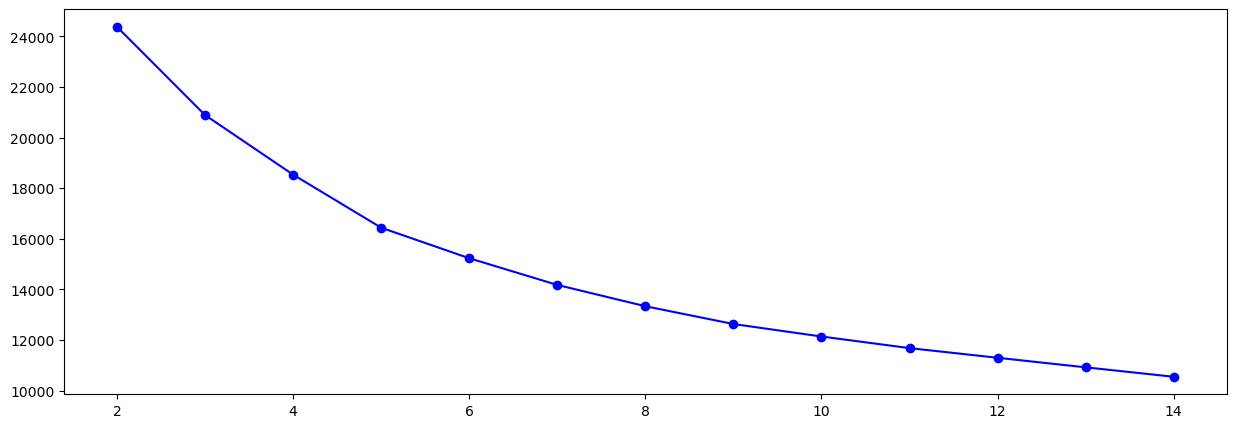

In [186]:
## creataing a dataframe of number of clusters and cluster errors.
cluster_df = pd.DataFrame({'num_clusters':cluster_range,'cluster_errors':cluster_errors})

## Elbow plot.
plt.figure(figsize=[15,5])
plt.plot(cluster_df['num_clusters'],cluster_df['cluster_errors'],marker='o',color='b')
plt.show()

- From the above elbow plot we can see at the cluster K=3, the inertia significantly decreases . Hence we can select our optimal clusters as K=3

In [187]:
## Applying KMeans clustering for the optimal number of clusters obtained above.
kmeans = KMeans(n_clusters=3, random_state=100)
kmeans.fit(pca_df)

KMeans(n_clusters=3, random_state=100)

In [188]:
## creating a dataframe of the labels.
label = pd.DataFrame(kmeans.labels_,columns=['Label'])

In [189]:
## joining the label dataframe to the pca_df dataframe.
kmeans_df = pca_df.join(label)
kmeans_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,Label
0,3.768895,-0.048007,-0.316748,2.064443,0.119482,0.030204,0.139909,0.211044,0
1,-2.366120,0.245773,-0.153093,-0.932754,0.633043,1.074954,-0.714390,0.925481,1
2,1.619611,0.133385,-1.040828,-0.056139,0.208088,-0.378051,-0.628203,0.734132,2
3,-2.508825,-1.418821,-0.065902,0.254671,-0.242851,-1.020479,-0.229391,0.296975,1
4,-0.455636,-0.120184,-0.664735,0.588757,-2.014072,-0.365029,0.752469,-0.294427,1


In [190]:
kmeans_df['Label'].value_counts()

Label
1    1037
2     647
0     556
Name: count, dtype: int64

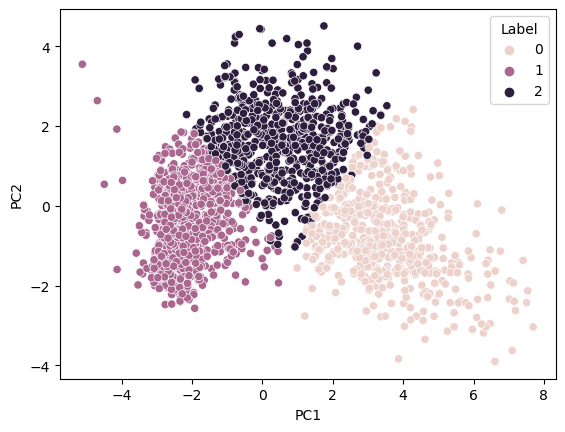

In [194]:
sns.scatterplot(x=kmeans_df['PC1'], y=kmeans_df['PC2'], hue=kmeans_df['Label'])
plt.show()

 17. Apply Agglomerative clustering and segment the data (Use Original data for clustering), and perform cluster analysis by doing bivariate analysis between the cluster label and different features and write your observations.

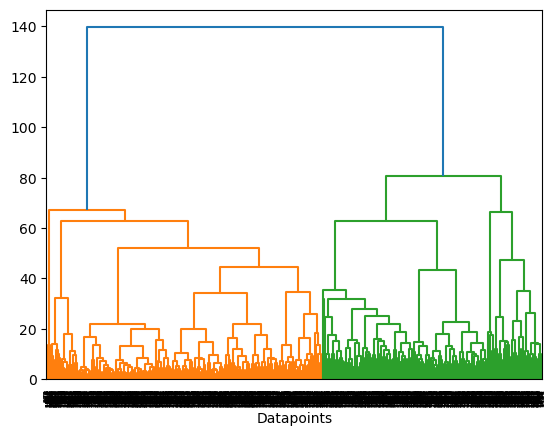

In [197]:

# Check for missing or invalid values
mask = np.isnan(scaled_features) | np.isinf(scaled_features)

# Replace missing or invalid values with a suitable value (e.g., 0)
scaled_features[mask] = 0

# Perform hierarchical clustering
merg = linkage(scaled_features, method='ward')
dendrogram(merg, leaf_rotation=90)
plt.xlabel('Datapoints')
plt.show()

Computing silhoutte score for agglomerative clustering

In [198]:
from sklearn.metrics import silhouette_score

In [199]:
for i in range(2,15):
    hier = AgglomerativeClustering(n_clusters=i)
    hier = hier.fit(scaled_features_df)
    labels = hier.fit_predict(scaled_features_df)
    print(i,silhouette_score(scaled_features_df,labels))

2 0.2111666169983298
3 0.1918619363837363
4 0.2017004952649186
5 0.21065224850571537
6 0.2099406629251995
7 0.18464751408270422
8 0.09343344370941407
9 0.09969048446060674
10 0.10727527895058214
11 0.10819407646948752
12 0.1108175234579998
13 0.11504726599630073
14 0.12304053759900338


 We can observe from the above dendrogram and as well as the silhoutte scores for different clusters, The highest silhoutte score is for clusters 3.
- Lets choose K=3 as the optimal cluster size and build a agglomerative clustering model using the original scaled dataset.

In [200]:
## Building hierarchical clustering model using the optimal clusters as 3 using original data
hie_cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean',
                                     linkage='ward')
hie_cluster_model = hie_cluster.fit(scaled_features_df)

In [201]:
## Creating a dataframe of the labels
df_label1 = pd.DataFrame(hie_cluster_model.labels_,columns=['Labels'])
df_label1.head(5)

,Labels
0,2
1,0
2,2
3,0
4,0


In [235]:
## joining the label dataframe with unscaled initial cleaned dataframe.(dfc)

df_hier = dfc.join(df_label1)
df_hier.head()

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,Labels
0,5524,1957,Graduation,Single,58138.0,4/9/2012,58,7,0,1617,25,0,1,2
1,2174,1954,Graduation,Single,46344.0,8/3/2014,38,5,0,27,6,2,0,0
2,4141,1965,Graduation,relationship,71613.0,21-08-2013,26,4,0,776,21,0,0,2
3,6182,1984,Graduation,relationship,26646.0,10/2/2014,26,6,0,53,8,1,0,0
4,5324,1981,PhD,relationship,58293.0,19-01-2014,94,5,0,422,19,1,0,0


Visualization and Interpretation of results

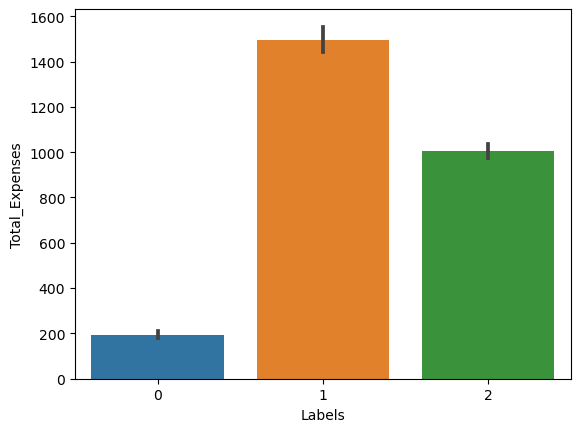

In [227]:
sns.barplot(x=df_hier['Labels'],y=df_hier['Total_Expenses'])
plt.show()

- The Total_Expenses is much higher for cluster 0 compared to the clusters 1 and 2.

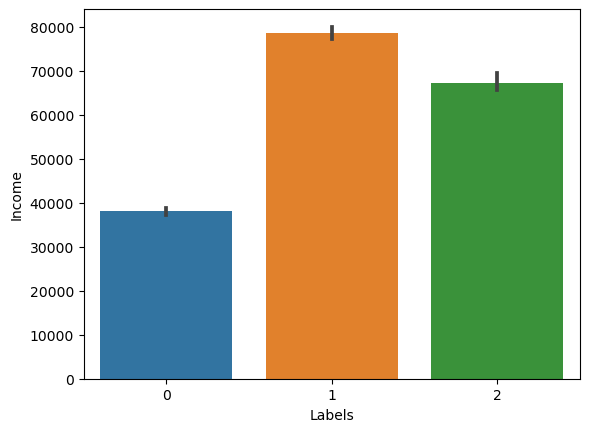

In [228]:
sns.barplot(x=df_hier['Labels'],y=df_hier['Income'])
plt.show()

- Where as the Income is also higher for the cluster 0 followed by cluster 2.

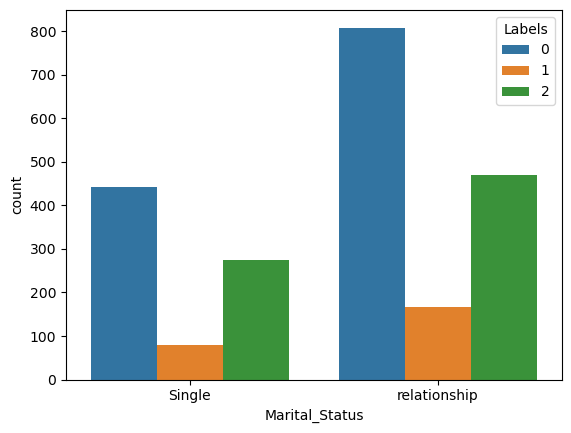

In [232]:
sns.countplot(x='Marital_Status', hue='Labels', data=df_hier)
plt.show()

- We can observe that the most of the customers who are in a relationship falls under cluster 0.

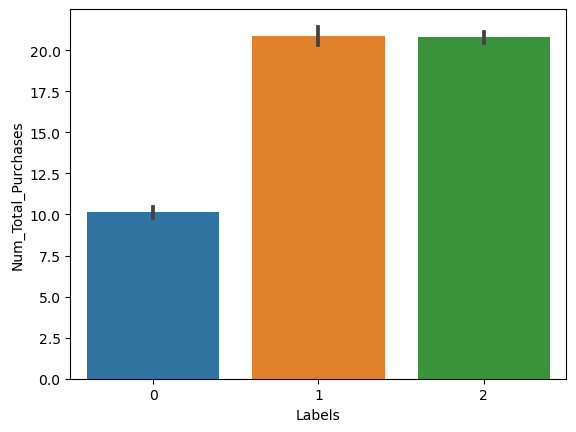

In [238]:
sns.barplot(x=df_hier['Labels'],y=df_hier['Num_Total_Purchases'])
plt.show()

The Total number of purchases is also much higher for customers from cluster 0 compared to cluster 1 and 2.

 We can conclude that the customers belong to cluster 0 does maximum purchases, has spend maximum amount and have maximum income.
- Where customers belong to cluster 1 has the least Total_expenses, minimum balance and does mimimum purchases compared to other two clusters.
- Customers belong to cluster 2 does average purchases, has average income.